# 1. Install Dependencies and Setup

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\rokha\Downloads\ImageClassification\imageclassification\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\rokha\Downloads\ImageClassification\imageclassification\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\rokha\Downloads\ImageClassification\imageclassification\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
               


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


In [3]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      2.0.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.2
certifi                      2023.7.22
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.0
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
executing                    2.0.1
flatbuffers                  23.5.26
fonttools                    4.44.0
gast                         0.5.4
google-auth                  2.23.4
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.59.2
h5py                         3.10.0
idna                         3.4
ipykernel                    6.26.0
ipython                      8.17.2
jedi                         0.19.1
jupyter_client               8.6.0
ju

In [4]:
import tensorflow as tf
import os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [7]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [8]:
import cv2
import imghdr

C:\Users\rokha\AppData\Local\Temp\ipykernel_22896\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [9]:
data_dir = 'data' 

In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
os.listdir(data_dir)

['happy', 'sad']

In [12]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [13]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [14]:
import matplotlib
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch = data_iterator.next()

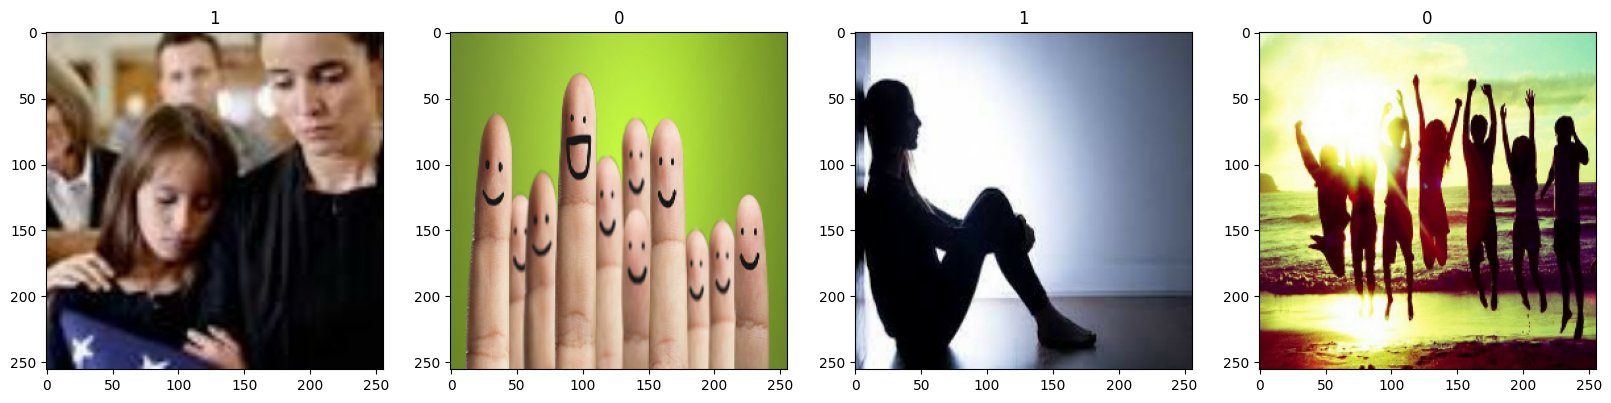

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [19]:
data = data.map(lambda x,y: (x/255, y))

In [20]:
data.as_numpy_iterator().next()

(array([[[[9.96078432e-01, 9.92156863e-01, 9.72549021e-01],
          [9.92708325e-01, 9.89123762e-01, 9.67830896e-01],
          [9.77389693e-01, 9.75337029e-01, 9.46384788e-01],
          ...,
          [9.86550272e-01, 9.80759799e-01, 9.48069870e-01],
          [9.91145849e-01, 9.86887276e-01, 9.64920342e-01],
          [9.92156863e-01, 9.88235295e-01, 9.68627453e-01]],
 
         [[9.96078432e-01, 9.92156863e-01, 9.72549021e-01],
          [9.92708325e-01, 9.89123762e-01, 9.67830896e-01],
          [9.77389693e-01, 9.75337029e-01, 9.46384788e-01],
          ...,
          [9.86550272e-01, 9.80759799e-01, 9.48069870e-01],
          [9.91145849e-01, 9.86887276e-01, 9.64920342e-01],
          [9.92156863e-01, 9.88235295e-01, 9.68627453e-01]],
 
         [[9.96078432e-01, 9.92156863e-01, 9.72549021e-01],
          [9.92708325e-01, 9.89123762e-01, 9.67830896e-01],
          [9.77389693e-01, 9.75337029e-01, 9.46384788e-01],
          ...,
          [9.86550272e-01, 9.80759799e-01, 9.4806

# 5. Split Data

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [22]:
train_size

7

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [24]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [30]:
logdir='logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 13s 1s/step - loss: 0.8415 - accuracy: 0.5536 - val_loss: 0.6344 - val_accuracy: 0.5312
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 0.6369 - accuracy: 0.6161 - val_loss: 0.6346 - val_accuracy: 0.6875
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.5972 - accuracy: 0.6786 - val_loss: 0.5174 - val_accuracy: 0.8281
Epoch 4/20
7/7 [==============================] - 10s 1s/step - loss: 0.5629 - accuracy: 0.7812 - val_loss: 0.4991 - val_accuracy: 0.8438
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 0.4737 - accuracy: 0.8393 - val_loss: 0.4672 - val_accuracy: 0.7500
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.3916 - accuracy: 0.8214 - val_loss: 0.3199 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.2853 - accuracy: 0.8839 - val_loss: 0.2716 - val_accuracy: 0.9219
Epoch 8/20
7/7 [======================

# 8. Plot Performance

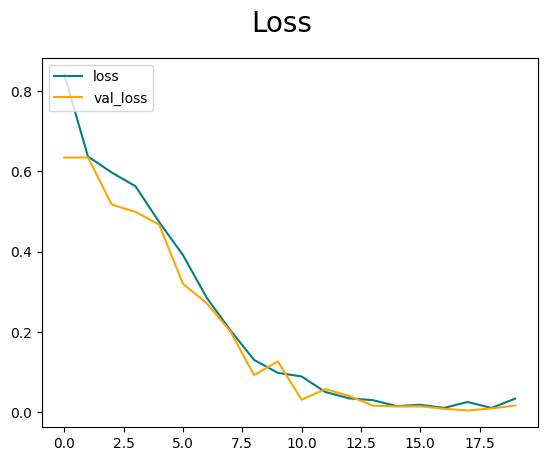

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

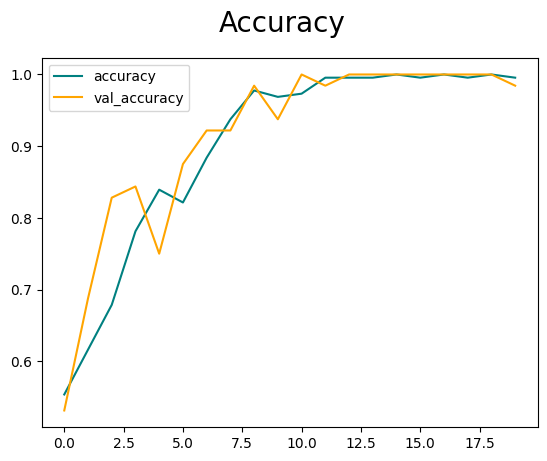

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 255ms/step


In [38]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [39]:
import cv2

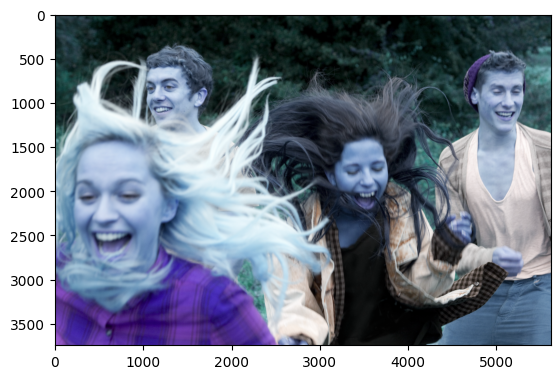

In [40]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

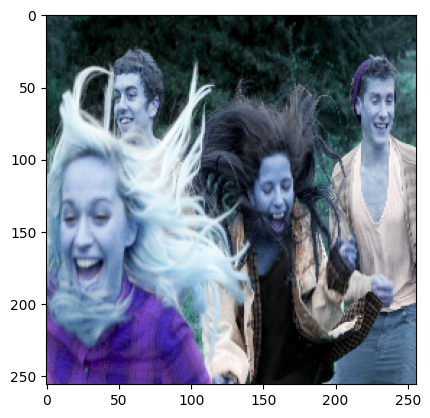

In [41]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [42]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 43ms/step


In [43]:
yhat

array([[0.31044108]], dtype=float32)

In [44]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
